# Recolección y manejo de los datos

1) Transfiera  el  dataset  a  un  frame  panda  utilizando  el  método `pd.read.csv(‘dirección_dataset_cargado.csv’)`

In [994]:
!git clone https://github.com/ChenaoB/Database

fatal: destination path 'Database' already exists and is not an empty directory.


In [995]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [996]:
"""
Se transfiere la data a pandas
"""
df = pd.read_csv("/content/Database/DataClasificationtMultiClass.csv")

2) Divida el dataset de la siguiente forma: 75% para entrenamiento el restante para validación

In [997]:
"""
Se divide el dataset en 75 para entrenamiento y el restante para test
"""
train_set = df.sample(frac = 0.75, random_state=39)
test_set = df.drop(train_set.index)

'''
Biding a los tags
'''
train_set['Y'] = train_set['Y'].replace({1: 0, -1: 1, -2: 2})
test_set['Y'] = test_set['Y'].replace({1: 0, -1: 1, -2: 2})

"""
Tengo 2 entradas: X1 X2
Tengo 3 tags: 0, 1, 2 (Por tanto es un problema multiclase)
"""
print(train_set[:10])
print(test_set[:10])

           X1        X2  Y
6   -0.561816  2.180823  0
34  -3.445386 -0.257710  0
148 -1.011993 -3.361826  2
82   2.709089  4.390507  1
38  -3.622843 -0.691365  0
26  -4.848649 -2.569317  0
128 -0.177514 -2.291634  2
29  -4.704847 -1.627705  0
143  5.268207  1.954758  2
131  4.577458  1.562529  2
          X1        X2  Y
3  -1.398284  1.674042  0
8  -3.023169  0.116955  0
12 -0.493259  1.793166  0
13 -0.023091  2.553153  0
30 -0.549819  2.040167  0
31 -3.348989 -0.252278  0
33 -4.430257 -1.598766  0
36 -1.740014  0.563963  0
40 -0.599669  1.764361  0
41 -2.778348  0.267897  0


# Modelo del perceptron

Entradas
 - X (x_train / x_test)
 - y (y_train / y_test)
 - w nombrado "weight" (Pesos iniciales)
 - α nombrado "alpha" (Learning rate)

In [998]:
# Construcción de matrices
y_train = train_set["Y"].values
y_test = test_set["Y"].values

x_train = np.column_stack((train_set[["X1", "X2"]].values, np.ones(train_set.shape[0])))
x_test = np.column_stack((test_set[["X1", "X2"]].values, np.ones(test_set.shape[0])))


print(f"Matriz de datos de entrenamiento: \n{[[*data] for data in x_train[:5]]}")
print(f"Matriz de etiquetas de entrenamiento: \n{y_train[:5]}", end="\n\n")

print(f"Matriz de datos de test: \n{[[*data] for data in x_test[:5]]}")
print(f"Matriz de etiquetas de test: \n{y_test[:5]}")

print(f"Conjunto de etiquetas: \n{np.unique(y_train)}")

Matriz de datos de entrenamiento: 
[[-0.5618156706, 2.180822928, 1.0], [-3.445386433, -0.2577095537, 1.0], [-1.011993341, -3.361825625, 1.0], [2.709088976, 4.390506628, 1.0], [-3.622843101, -0.6913645865, 1.0]]
Matriz de etiquetas de entrenamiento: 
[0 0 2 1 0]

Matriz de datos de test: 
[[-1.39828397, 1.674042252, 1.0], [-3.02316863, 0.1169548477, 1.0], [-0.4932593848, 1.793166131, 1.0], [-0.02309111741, 2.553153456, 1.0], [-0.5498188339, 2.040167373, 1.0]]
Matriz de etiquetas de test: 
[0 0 0 0 0]
Conjunto de etiquetas: 
[0 1 2]


3) Inicialice el vector de parámetros W utilizando algún método de muestreo estadístico, recuerde que para un problema biclase W este tiene tres valores.

In [999]:
# Se definen una cantidad de clases y una cantidad de caracteristicas

num_classes = len(np.unique(y_train))
num_features = x_train.shape[1]

In [1000]:
# Usando una distribución uniforme

weight = np.random.rand(num_classes, num_features)
print(f"Pesos iniciales (weight): \n{weight}")

Pesos iniciales (weight): 
[[0.74196489 0.40437111 0.4976555 ]
 [0.86511858 0.43290687 0.98330175]
 [0.94112726 0.39779633 0.7688393 ]]


4) Establezca un valor de α (Learning rate) = 0.3

In [1001]:
alpha = 0.3

In [1002]:
iteration = 3000

In [1003]:
use_umbral = True

5) Implemente el algoritmo de perceptron para actualizar los valores del vector de parámetros 𝑊 (puede utilizar cualquiera de las alternativas estudiadas en clase)

In [1004]:
for iter in range(iteration):
  for item in range(train_set.shape[0]):
    for class_idx in range(num_classes):
      y_predict = 1 if np.dot(weight[class_idx], x_train[item, :]) >= 0 else 0
      y_class = 1 if y_train[item] == class_idx else 0

      if y_predict != y_class:
          if use_umbral:
              weight[class_idx] += alpha * x_train[item, :] * (1 - y_predict)
          else:
              weight[class_idx] -= 2 * alpha * x_train[item, :] * (y_predict - y_class)

# Analisis del algoritmo

In [1005]:
correct = 0
for item in range(train_set.shape[0]):
    true_label = y_train[item]
    predicted_label = np.argmax(np.dot(weight, x_train[item, :]))

    if true_label == predicted_label:
        correct += 1

accuracy = correct / train_set.shape[0]
print(f'Precisión en el set de entrenamiento: {accuracy * 100:.2f}%')

Precisión en el set de entrenamiento: 79.46%


In [1006]:
def mesh_draw(data_set, stage_set, color, mesh_label):

  # Visualizar la curva de decisión
  plt.figure(figsize=(8, 6))

  # Crear una malla de puntos para la visualización
  x_min, x_max = data_set[:, 0].min() - 1, data_set[:, 0].max() + 1
  y_min, y_max = data_set[:, 1].min() - 1, data_set[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  # Predecir la clase para cada punto en la malla
  Z = np.argmax(np.dot(np.column_stack((xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0]))), weight.T), axis=1)
  Z = Z.reshape(xx.shape)

  # Visualizar la curva de decisión
  plt.contourf(xx, yy, Z, cmap=color, alpha=0.8)

  # Añadir puntos de datos de muestra
  plt.scatter(data_set[:, 0], data_set[:, 1], c=stage_set, edgecolors='k', cmap=color, marker='o', s=50)

  # Configurar etiquetas y título
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title(f"{mesh_label}")

  # Mostrar el gráfico
  plt.show()

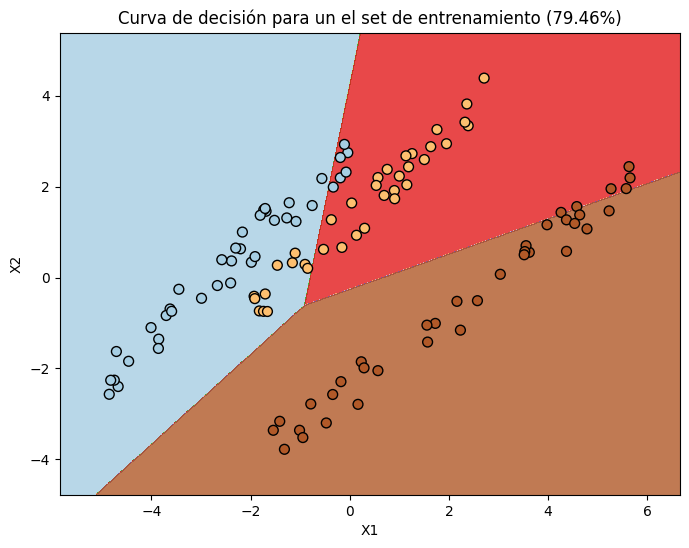

In [1007]:
mesh_draw(x_train, y_train, plt.cm.Paired, f'Curva de decisión para un el set de entrenamiento ({accuracy * 100:.2f}%)')

In [1008]:
correct = 0
for item in range(test_set.shape[0]):
    true_label = y_test[item]
    predicted_label = np.argmax(np.dot(weight, x_test[item, :]))

    if true_label == predicted_label:
        correct += 1

accuracy = correct / test_set.shape[0]
print(f'Precisión en el set de pruebas: {accuracy * 100:.2f}%')

Precisión en el set de pruebas: 92.11%


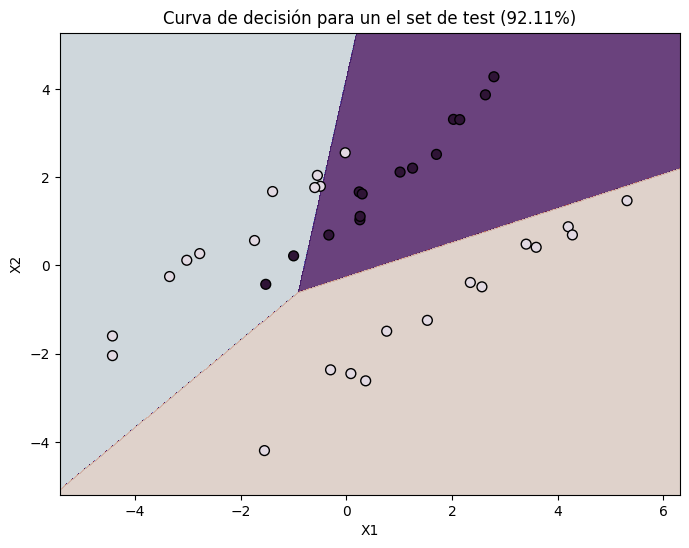

In [1009]:
mesh_draw(x_test, y_test, plt.cm.twilight, f'Curva de decisión para un el set de test ({accuracy * 100:.2f}%)')

In [1010]:
'''
Utilidades para graficar
'''
def draw_tag(tags, stage_set, stage_label = ""):
  unique_tags = np.unique(tags)
  for tag in range(unique_tags.shape[0]):
    index_tag_class = np.where(tags == unique_tags[tag])
    tag_class = stage_set[["X1", "X2"]].iloc[index_tag_class]
    plt.scatter(tag_class["X1"], tag_class["X2"], color=np.random.rand(3,), label=f"{stage_label} X{tag + 1}", s=8)

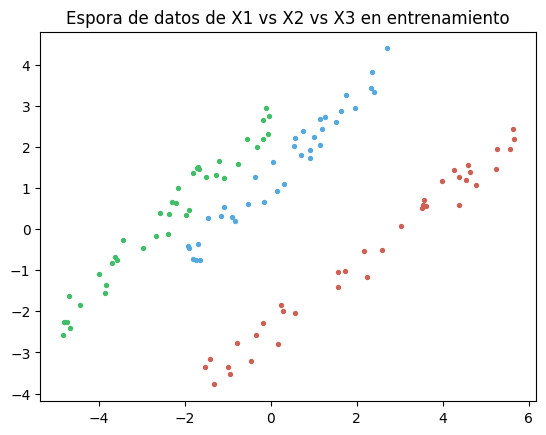

In [1011]:
"""
Grafica de X1 vs X2 vs X3 (Train)
"""
draw_tag(y_train, train_set, "(Train)")

plt.title("Espora de datos de X1 vs X2 vs X3 en entrenamiento")
plt.show()

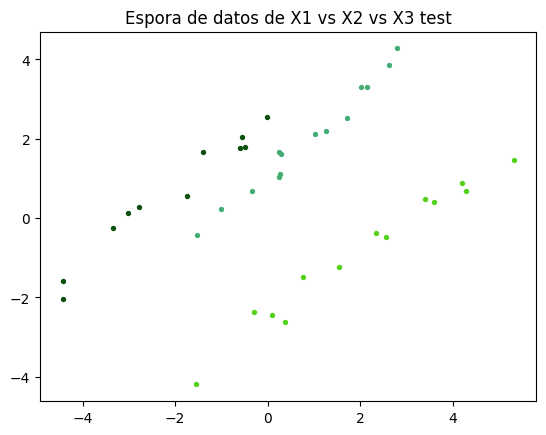

In [1012]:
"""
Grafica de X1 vs X2 vs X3 (Test)
"""
draw_tag(y_test, test_set, "(Test)")

plt.title("Espora de datos de X1 vs X2 vs X3 test")
plt.show()

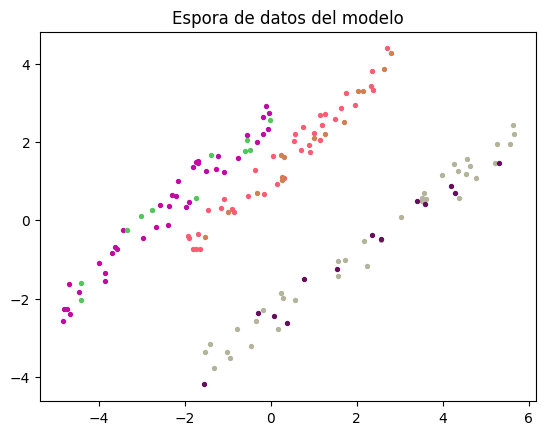

In [1013]:
# Grafico de los datos en una misma imagen
"""
Grafica de X1 vs X2 vs X3 (Train)
"""
draw_tag(y_train, train_set, "(Train)")

"""
Grafica de X1 vs X2 vs X3 (Test)
"""
draw_tag(y_test, test_set, "(Test)")

plt.title("Espora de datos del modelo")
plt.show()

In [1014]:
'''
Extrayendo caracteristicas para la matriz de confusión
'''

def confusion_matrix(y_true, y_pred, num_classes):
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1

    return conf_matrix

# Predicciones en el conjunto de prueba
y_pred_test = np.argmax(np.dot(x_test, weight.T), axis=1)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test, num_classes)
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[10  1  0]
 [ 2 12  0]
 [ 0  0 13]]


In [1015]:
'''
Otras analisticas extraidas de la matriz de confusión
'''

# Calcular y mostrar métricas adicionales
accuracy = (conf_matrix.diagonal().sum()) / conf_matrix.sum()
precision = conf_matrix.diagonal() / conf_matrix.sum(axis=0)
recall = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Se ignora la división por 0 (Se espera que eso suceda)
np.seterr(divide='ignore', invalid='ignore')

print(f"Exactitud: \n{accuracy}")
print(f"Precisión por clase: \n{precision}")
print(f"Recall por clase: \n{recall}")
print(f"F1-Score por clase: \n{f1_score}")

Exactitud: 
0.9210526315789473
Precisión por clase: 
[0.83333333 0.92307692 1.        ]
Recall por clase: 
[0.90909091 0.85714286 1.        ]
F1-Score por clase: 
[0.86956522 0.88888889 1.        ]


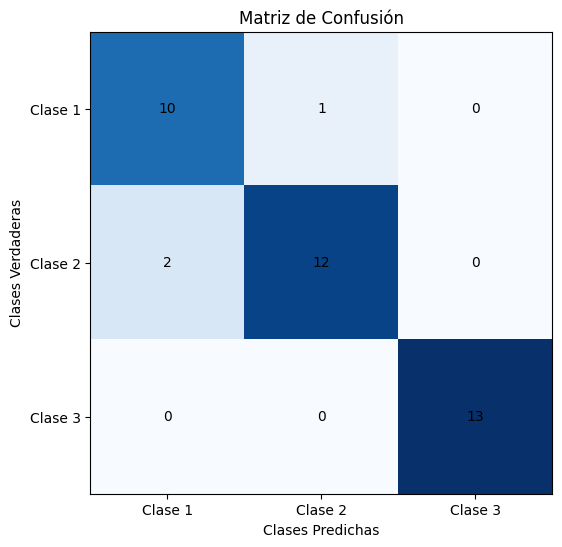

In [1016]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el mapa de calor con plt.imshow
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# Mostrar valores en cada celda
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

# Configurar etiquetas y título
plt.xticks(range(len(conf_matrix)), ['Clase 1', 'Clase 2', 'Clase 3'])
plt.yticks(range(len(conf_matrix)), ['Clase 1', 'Clase 2', 'Clase 3'])
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# Bibliografia

Para la adaptación se tomó de base practica el articulo [Multi-class Classification One-vs-all & One-vs-one](https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b), como base teorica lo visto en clase